# TAREA 1
## INTEGRANTES: Iván Vázquez , Juan Daniel Rosales y Sandra Gómez

**Ejercicio 1: Cómo los parámetros afectan el comportamiento de la neurona LIF**

El modelo de neurona Leaky Integrate-and-Fire (LIF) es uno de varios modelos que describen el comportamiento de una neurona. En este modelo, algunos parámetros claves afectan su comportamiento de la siguiente manera:

**Membrane time constant (membrane_time_scale):** Este parámetro determina cuánto tiempo tarda el voltaje de la membrana en decaer hacia su potencial de reposo cuando no hay corriente entrante. Un valor más grande significa que la membrana mantiene el voltaje más tiempo antes de "filtrarse". Con valores pequeños, la neurona regresa más rápidamente a su estado de reposo, afectando la cantidad de disparos.

**Membrane resistance (membrane_resistance):** La resistencia de la membrana controla la respuesta del voltaje de la membrana a la corriente entrante. Una resistencia alta amplifica la respuesta del voltaje a corrientes pequeñas, haciendo que la neurona sea más sensible a la entrada.

**Firing threshold (firing_threshold):** Este es el valor de voltaje que la neurona debe alcanzar para disparar un potencial de acción (spike). Si el umbral es más bajo, la neurona disparará con mayor facilidad; si es más alto, será más difícil disparar.

**Absolute refractory period (abs_refractory_period):** Después de que la neurona dispara un potencial de acción, entra en un período refractario absoluto, durante el cual no puede disparar otro potencial de acción. Un período refractario más largo limita la frecuencia máxima de disparo de la neurona.

**Resting potential (v_rest):** Es el voltaje de la membrana cuando la neurona está en reposo, sin recibir estímulos. Si este valor se acerca al umbral de disparo, la neurona será más propensa a disparar.

**Reset potential (v_reset):** Después de que la neurona dispara, el voltaje de la membrana se reinicia a este valor. Un valor de reset cercano al umbral hará que sea más probable que la neurona vuelva a disparar rápidamente después de un potencial de acción.

# Ejercicio 2: Ajustar los parámetros para obtener 5 disparos

En este ejercicio, ajustamos los parámetros de la neurona LIF para que genere exactamente 5 disparos. Utilizaremos el modelo de **Leaky Integrate-and-Fire (LIF)** y ajustaremos parámetros como la corriente de entrada y el umbral de disparo.

Parámetros clave que ajustaremos:
- **Current Input (I)**: Modificaremos la amplitud de la corriente de entrada para generar la actividad deseada.
- **Membrane resistance y Membrane time constant**: Estos parámetros también afectarán la cantidad de disparos.

El objetivo es encontrar una configuración que permita obtener exactamente 5 disparos.


Número de disparos: 5


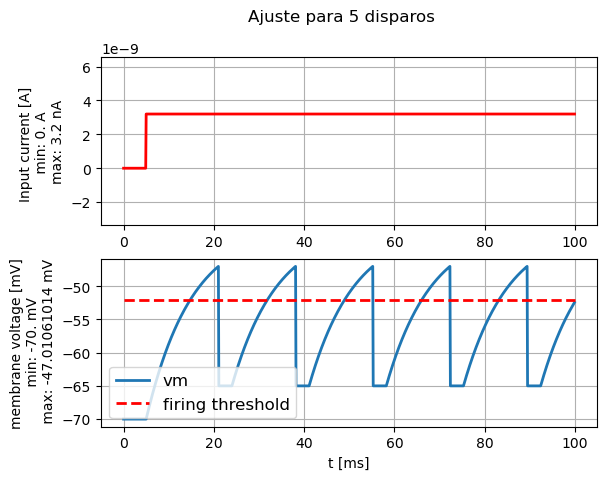

In [37]:
from brian2 import *
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools
import matplotlib.pyplot as plt

# Parámetros ajustados para obtener 5 disparos
sim_time = 100  # en ms
i_min = 3.2 * nA  # Ajustar la corriente de entrada

# Crear una corriente escalonada con la amplitud ajustada
step_current = input_factory.get_step_current(t_start=5, t_end=int(sim_time), unit_time=ms, amplitude=i_min)

# Simular el modelo LIF con parámetros ajustados
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(
    input_current=step_current, 
    simulation_time=sim_time * ms,
    membrane_time_scale=10. * ms,
    membrane_resistance=9. * Mohm,
    firing_threshold=-47. * mV,  
    abs_refractory_period=3. * ms,
    v_rest=-70. * mV,
    v_reset=-65. * mV
)

# Graficar la actividad neuronal y la corriente aplicada
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="Ajuste para 5 disparos", firing_threshold=-52. * mV)
print(f"Número de disparos: {spike_monitor.count[0]}")

En este código, se logra obtener **5 disparos** ajustando varios parámetros del modelo LIF. A continuación, se explican las variables clave que influyen en esta simulación:

1. **Corriente de entrada (step_current)**:  
   Se genera una corriente escalonada utilizando *input_factory.get_step_current*, con un inicio en **5 ms** y una duración total de **100 ms**. Esta corriente es fundamental para impulsar el potencial de membrana, y su amplitud se ajusta a **3.2 nA** para proporcionar el estimulo necesario para que la neurona dispare.

2. **Umbral de disparo (firing_threshold)**:  
   Ajustado a **-47 mV**, este parámetro define el potencial que la neurona debe alcanzar para generar un disparo. La reducción del umbral es crucial en este ajuste; al disminuir el valor del umbral, se facilita que el voltaje de la membrana supere este límite, lo que permite que la neurona dispare con mayor frecuencia y, en este caso, llegue a los 5 disparos deseados.

3. **Período refractario absoluto (abs_refractory_period)**:  
   Establecido en **3 ms**, este parámetro controla el tiempo que la neurona necesita para recuperarse después de un disparo. Un periodo refractario más corto puede permitir disparos más rápidos, pero también aumenta el riesgo de que se pierda la capacidad de recuperación entre disparos.
4. **Resistencia de la membrana (membrane_resistance)**:  
   Con un valor de **9 Mohm**, la resistencia de la membrana afecta cómo el voltaje de la membrana se eleva en respuesta a la corriente. Una resistencia más alta permite que pequeñas corrientes generen cambios significativos en el voltaje.

5. **Constante de tiempo de la membrana (membrane_time_scale)**:  
   Ajustada a **10 ms**, esta constante determina la rapidez con la que el voltaje de la membrana se adapta a los cambios en la corriente aplicada. Permite que la neurona reaccione de manera efectiva al estímulo sin saturar la actividad de disparo.

**Ajuste Clave**
El **firing threshold** fue el parámetro principal para lograr los 5 disparos. Al reducir el umbral de disparo, se logró que la neurona dispare más fácilmente, alcanzando el objetivo de 5 disparos en la simulación.


# Ejercicio 3: Definir una neurona con NeuronGroup de Brian2

En este ejercicio, definimos una neurona con el uso de la clase **NeuronGroup** de la biblioteca **Brian2**. Vamos a simular el comportamiento de una neurona de integración y disparo (LIF) utilizando esta clase, con el objetivo de observar cómo se comporta la neurona en términos de disparos.

**NeuronGroup** nos permite definir redes neuronales, pero en este caso, utilizamos solo una neurona para simplificar la simulación.


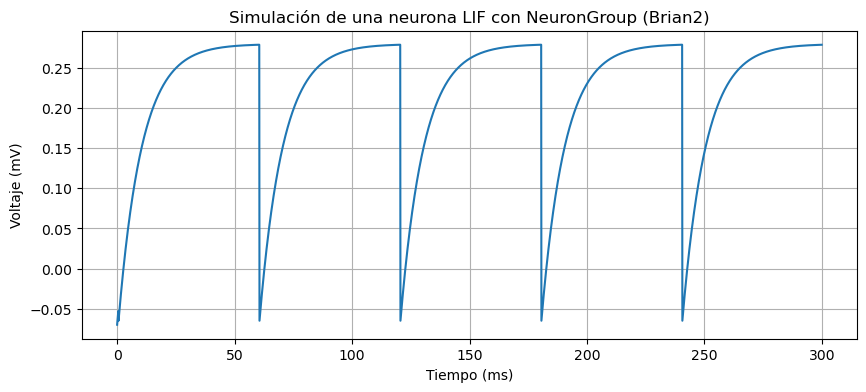

Número de disparos: 5


In [39]:
from brian2 import *

# Parámetros ajustables para lograr disparos
membrane_time_scale = 10 * ms  # Constante de tiempo de la membrana
membrane_resistance = 100 * Mohm  # Resistencia de la membrana
firing_threshold = -50 * mV  # Umbral de disparo
abs_refractory_period = 60 * ms  # Periodo refractario absoluto
v_rest = -70 * mV  # Potencial de reposo
v_reset = -65 * mV  # Potencial de reset

# Ecuación diferencial del modelo LIF corregida: I * R en lugar de I / R
eqs = '''
dv/dt = (v_rest - v + I * membrane_resistance) / membrane_time_scale : volt
I : amp
'''

# Definir el grupo de neuronas con el método LIF
G = NeuronGroup(1, model=eqs, threshold='v > firing_threshold', reset='v = v_reset',
                refractory=abs_refractory_period, method='exact')

# Inicializar el voltaje al valor de reposo
G.v = v_rest

# Crear estímulo de corriente constante
stimulus = TimedArray([0 * nA, 3.5 * nA, 3.5 * nA, 0 * nA, 3.5 * nA], dt=50 * ms)
G.I = stimulus(G.t)

# Monitorear el voltaje y los disparos
monitor = StateMonitor(G, 'v', record=True)
spike_monitor = SpikeMonitor(G)

# Crear una red
network = Network(G, monitor, spike_monitor)

# Ejecutar la simulación
network.run(300 * ms)  # Asegúrate de que la duración sea suficiente

# Graficar los resultados
plt.figure(figsize=(10, 4))
plot(monitor.t / ms, monitor.v[0])
xlabel('Tiempo (ms)')
ylabel('Voltaje (mV)')
title('Simulación de una neurona LIF con NeuronGroup (Brian2)')
grid()
show()

# Mostrar el número de disparos
print(f"Número de disparos: {spike_monitor.count[0]}")

En este código, se logran **5 disparos** ajustando varios parámetros del modelo LIF. A continuación, se detalla cómo cada uno influye en la obtención de los disparos:

1. **Corriente de entrada (stimulus)**: 
    La corriente es lo que impulsa el voltaje de la membrana. Aumentar el valor de corriente y la duración (con **TimedArray**) impulsa más el potencial de membrana, llevando a disparos.

2. **Umbral de disparo (firing_threshold)**: 
   Establecido en **-50 mV**, define el nivel que el voltaje necesita superar para generar un disparo. Un umbral más bajo genera más disparos.

3. **Período refractario absoluto (abs_refractory_period)**: 
   Establecido en **60 ms**, impide que la neurona dispare inmediatamente después de un disparo. Aumentarlo reduce la cantidad de disparos, ya que la neurona necesita más tiempo para recuperarse.

4. **Resistencia de la membrana (membrane_resistance)**: 
   Aumentarla a **100 Mohm** hace que una corriente más pequeña genere un cambio mayor en el voltaje, facilitando los disparos.

5. **Constante de tiempo de la membrana (membrane_time_scale)**: 
   Controla la rapidez con la que el voltaje de la membrana se ajusta. Con **10 ms*]*, la membrana responde lo suficientemente rápido a la corriente, pero no tanto como para saturar el número de disparos.

**Ajuste clave**

El **período refractario absoluto** es nuestro factor principal para lograr la cantidad de 5 disparos, ya que incrementarlo da tiempo para que la neurona se recupere entre disparos, limitando la frecuencia de disparo.